[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/baysian_filter.ipynb)

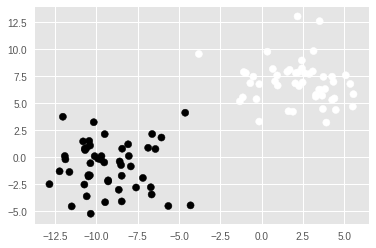

In [1]:
from sklearn import datasets
X,y=datasets.make_blobs(100,2,centers=2,random_state=3600,cluster_std=2)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.scatter(X[:,0],X[:,1],c=y,s=50)

In [2]:
import numpy as np
from sklearn import model_selection as ms
X=X.astype(np.float32)
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.1)
import cv2
model_norm=cv2.ml.NormalBayesClassifier_create()
model_norm.train(X_train,cv2.ml.ROW_SAMPLE,y_train)

True

In [3]:
_,y_pred=model_norm.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

1.0

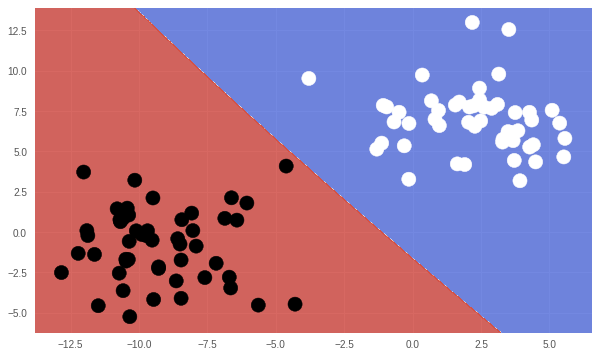

In [4]:
def plot_decision_boundary(model, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.column_stack((xx.ravel().astype(np.float32),
                              yy.ravel().astype(np.float32)))
    ret = model.predict(X_hypo)
    if isinstance(ret, tuple):
        zz = ret[1]
    else:
        zz = ret
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)
    
plt.figure(figsize=(10, 6))
plot_decision_boundary(model_norm, X, y)

In [7]:
ret, y_pred, y_proba = model_norm.predictProb(X_test)
y_proba.round(2)

array([[0.  , 0.15],
       [0.14, 0.  ],
       [0.  , 0.11],
       [0.  , 0.13],
       [0.  , 0.06],
       [0.12, 0.  ],
       [0.  , 0.06],
       [0.  , 0.15],
       [0.  , 0.18],
       [0.  , 0.04]], dtype=float32)

In [8]:
from sklearn import naive_bayes
model_naive = naive_bayes.GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB(priors=None)

In [9]:
model_naive.score(X_test, y_test)

1.0

In [10]:
yprob = model_naive.predict_proba(X_test)
yprob.round(2)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

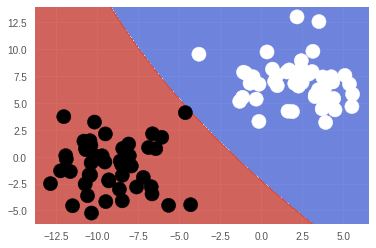

In [11]:
plot_decision_boundary(model_naive,X,y)

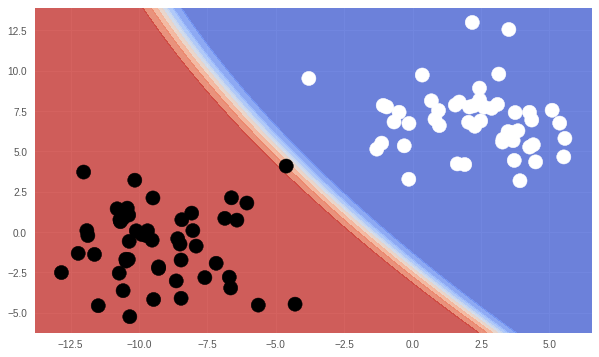

In [13]:
def plot_proba(model, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.column_stack((xx.ravel().astype(np.float32),
                              yy.ravel().astype(np.float32)))
    if hasattr(model, 'predictProb'):
        _, _, y_proba = model.predictProb(X_hypo)
    else:
        y_proba = model.predict_proba(X_hypo)
    
    zz = y_proba[:, 1] - y_proba[:, 0]
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)
plt.figure(figsize=(10, 6))
plot_proba(model_naive, X, y)

In [0]:
HAM = 0
SPAM = 1
datadir = 'data/chapter7'
sources = [
    ('beck-s.tar.gz', HAM),
    ('farmer-d.tar.gz', HAM),
    ('kaminski-v.tar.gz', HAM),
    ('kitchen-l.tar.gz', HAM),
    ('lokay-m.tar.gz', HAM),
    ('williams-w3.tar.gz', HAM),
    ('BG.tar.gz', SPAM),
    ('GP.tar.gz', SPAM),
    ('SH.tar.gz', SPAM)
]

In [0]:
def extract_tar(datafile, extractdir):
    try:
        import tarfile
    except ImportError:
        raise ImportError("You do not have tarfile installed. "
                          "Try unzipping the file outside of Python.")

    tar = tarfile.open(datafile)
    tar.extractall(path=extractdir)
    tar.close()
    print("%s successfully extracted to %s" % (datafile, extractdir))

In [17]:
from google.colab import files
uploaded = files.upload()

Saving williams-w3.tar.gz to williams-w3.tar.gz
Saving lokay-m.tar.gz to lokay-m.tar.gz
Saving kitchen-l.tar.gz to kitchen-l.tar.gz
Saving kaminski-v.tar.gz to kaminski-v.tar.gz
Saving farmer-d.tar.gz to farmer-d.tar.gz
Saving beck-s.tar.gz to beck-s.tar.gz
Saving SH.tar.gz to SH.tar.gz
Saving GP.tar.gz to GP.tar.gz
Saving BG.tar.gz to BG.tar.gz
